<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/Medical_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import os
from tensorflow import keras
import zipfile
from google.colab import files
import matplotlib.pyplot as plt

In [68]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
local_zip= '/content/brain_tumor_dataset.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
train_no_tumor_dir= os.path.join('/content/brain_tumor_dataset/Train/no')
train_tumor_dir= os.path.join('/content/brain_tumor_dataset/Train/yes')
test_no_tumor_dir= os.path.join('/content/brain_tumor_dataset/Test/no')
test_tumor_dir= os.path.join('/content/brain_tumor_dataset/Test/yes')

In [71]:
print('Total Train No Tumor images: ',len(os.listdir(train_no_tumor_dir)))
print('Total Train Tumor images: ',len(os.listdir(train_tumor_dir)))
print('Total Test No Tumor images: ',len(os.listdir(test_no_tumor_dir)))
print('Total Test Tumor images: ',len(os.listdir(test_tumor_dir)))

Total Train No Tumor images:  68
Total Train Tumor images:  121
Total Test No Tumor images:  30
Total Test Tumor images:  34


# Creating the Model

In [0]:
model= keras.Sequential([
    keras.layers.Conv2D(16,(7,7), activation='relu', input_shape=(214,214,3)),
    keras.layers.BatchNormalization(axis= 1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,(5,5), activation='relu'),
    keras.layers.BatchNormalization(axis= 1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis= 1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.4),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', activity_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')
])

In [73]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 208, 208, 16)      2368      
_________________________________________________________________
batch_normalization_30 (Batc (None, 208, 208, 16)      832       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 104, 104, 16)      0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 104, 104, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 100, 100, 32)      12832     
_________________________________________________________________
batch_normalization_31 (Batc (None, 100, 100, 32)      400       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 50, 50, 32)      

In [0]:
from tensorflow.keras.optimizers import RMSprop

#compiling the model
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen= train_datagen.flow_from_directory( '/content/brain_tumor_dataset/Train',
                                            target_size=(214,214),
                                            batch_size=19,
                                            class_mode='binary')

test_datagen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_gen= test_datagen.flow_from_directory( '/content/brain_tumor_dataset/Test',
                                            target_size=(214,214),
                                            batch_size=7,
                                            class_mode='binary')

Found 189 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


# Taining the model

In [0]:
class myCall(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.75):
      print('\nThe Training is Cancelled.....')
      self.model.stop_training= True

callback= myCall()

In [77]:
history= model.fit_generator( train_gen,
                   steps_per_epoch=10,
                   epochs=100,
                   validation_data= test_gen,
                   validation_steps= 10,
                   verbose=2,
                   callbacks=[callback] )

Epoch 1/100
Epoch 1/100
10/10 - 2s - loss: 0.6938 - acc: 0.5156
10/10 - 5s - loss: 0.8907 - acc: 0.6085 - val_loss: 0.6938 - val_acc: 0.5156
Epoch 2/100
Epoch 1/100
10/10 - 1s - loss: 0.6961 - acc: 0.5938
10/10 - 3s - loss: 0.6993 - acc: 0.6455 - val_loss: 0.6961 - val_acc: 0.5938
Epoch 3/100
Epoch 1/100
10/10 - 1s - loss: 0.7012 - acc: 0.5938
10/10 - 3s - loss: 0.6460 - acc: 0.6667 - val_loss: 0.7012 - val_acc: 0.5938
Epoch 4/100
Epoch 1/100
10/10 - 1s - loss: 0.7031 - acc: 0.5938
10/10 - 3s - loss: 0.6372 - acc: 0.6878 - val_loss: 0.7031 - val_acc: 0.5938
Epoch 5/100
Epoch 1/100
10/10 - 1s - loss: 0.7230 - acc: 0.5312
10/10 - 3s - loss: 0.6171 - acc: 0.6984 - val_loss: 0.7230 - val_acc: 0.5312
Epoch 6/100
Epoch 1/100
10/10 - 1s - loss: 0.7088 - acc: 0.6094
10/10 - 3s - loss: 0.6543 - acc: 0.6667 - val_loss: 0.7088 - val_acc: 0.6094
Epoch 7/100
Epoch 1/100
10/10 - 1s - loss: 0.7508 - acc: 0.5312
10/10 - 3s - loss: 0.6361 - acc: 0.6931 - val_loss: 0.7508 - val_acc: 0.5312
Epoch 8/100
E

# Vizualizing
Going to vizualize the model's accuracy and the loss on the graph.

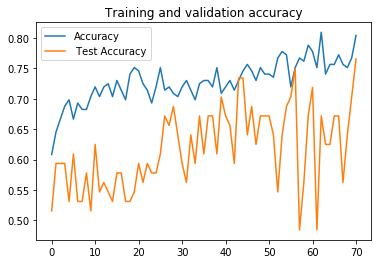

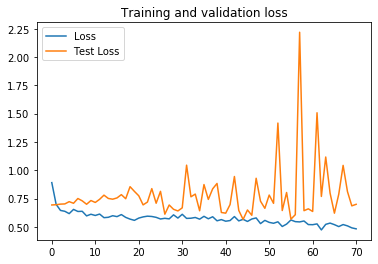

In [78]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_acc, label=' Test Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, label='Loss')
plt.plot(epochs, val_loss, label='Test Loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.show()

# Saving the Model
We are required to save the tensorflow keras model in the form of .h5 keras file as it can be deployed easily and can be loaded to another model for weights.

In [0]:
model.save('Model_Medical_Diagnosis.h5')